In [236]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import LeaveOneOut

In [49]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", None, "Мария"],
    "Возраст": [25, 30, None, 40, 35],
    "Город": ["Москва", None, "Казань", "Новосибирск", "СПб"]
}

df = pd.DataFrame(data)
display(df)

print(f"\n{df.isna()}")
print(f"\n{df.isna().sum()}")

,Имя,Возраст,Город
0,Анна,25.0,Москва
1,Иван,30.0,None
2,Ольга,NaN,Казань
3,None,40.0,Новосибирск
4,Мария,35.0,СПб



     Имя  Возраст  Город
0  False    False  False
1  False    False   True
2  False     True  False
3   True    False  False
4  False    False  False

Имя        1
Возраст    1
Город      1
dtype: int64


In [21]:
print(df.notna())
print(f"\n{df.notna().sum()}")

     Имя  Возраст  Город
0   True     True   True
1   True     True  False
2   True    False   True
3  False     True   True
4   True     True   True

Имя        4
Возраст    4
Город      4
dtype: int64


In [29]:
np.random.seed(42)

data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий",
    "Елена", "Сергей", "Алина", "Артем"],
    "Возраст": [25, np.nan, 22, 40, 35, np.nan, 28, 31, np.nan, 29],
    "Город": ["Москва", "СПб", np.nan, "Новосибирск", "СПб",
    "Екатеринбург", np.nan, "Казань", "Томск", np.nan],
    "Доход": [50000, 60000, np.nan, 70000, 65000, 55000, 48000,
    np.nan, 52000, 58000],
    "Образование": [np.nan, "Высшее", "Среднее", "Высшее", np.nan,
    "Высшее", "Среднее", "Высшее", np.nan, "Среднее"],
    "Стаж работы": [3, 8, 1, 15, 10, np.nan, 5, 7, np.nan, 2]
}

df = pd.DataFrame(data)

display(df)

,Имя,Возраст,Город,Доход,Образование,Стаж работы
0,Анна,25.0,Москва,50000.0,NaN,3.0
1,Иван,NaN,СПб,60000.0,Высшее,8.0
2,Ольга,22.0,NaN,NaN,Среднее,1.0
3,Петр,40.0,Новосибирск,70000.0,Высшее,15.0
4,Мария,35.0,СПб,65000.0,NaN,10.0
5,Дмитрий,NaN,Екатеринбург,55000.0,Высшее,NaN
6,Елена,28.0,NaN,48000.0,Среднее,5.0
7,Сергей,31.0,Казань,NaN,Высшее,7.0
8,Алина,NaN,Томск,52000.0,NaN,NaN
9,Артем,29.0,NaN,58000.0,Среднее,2.0


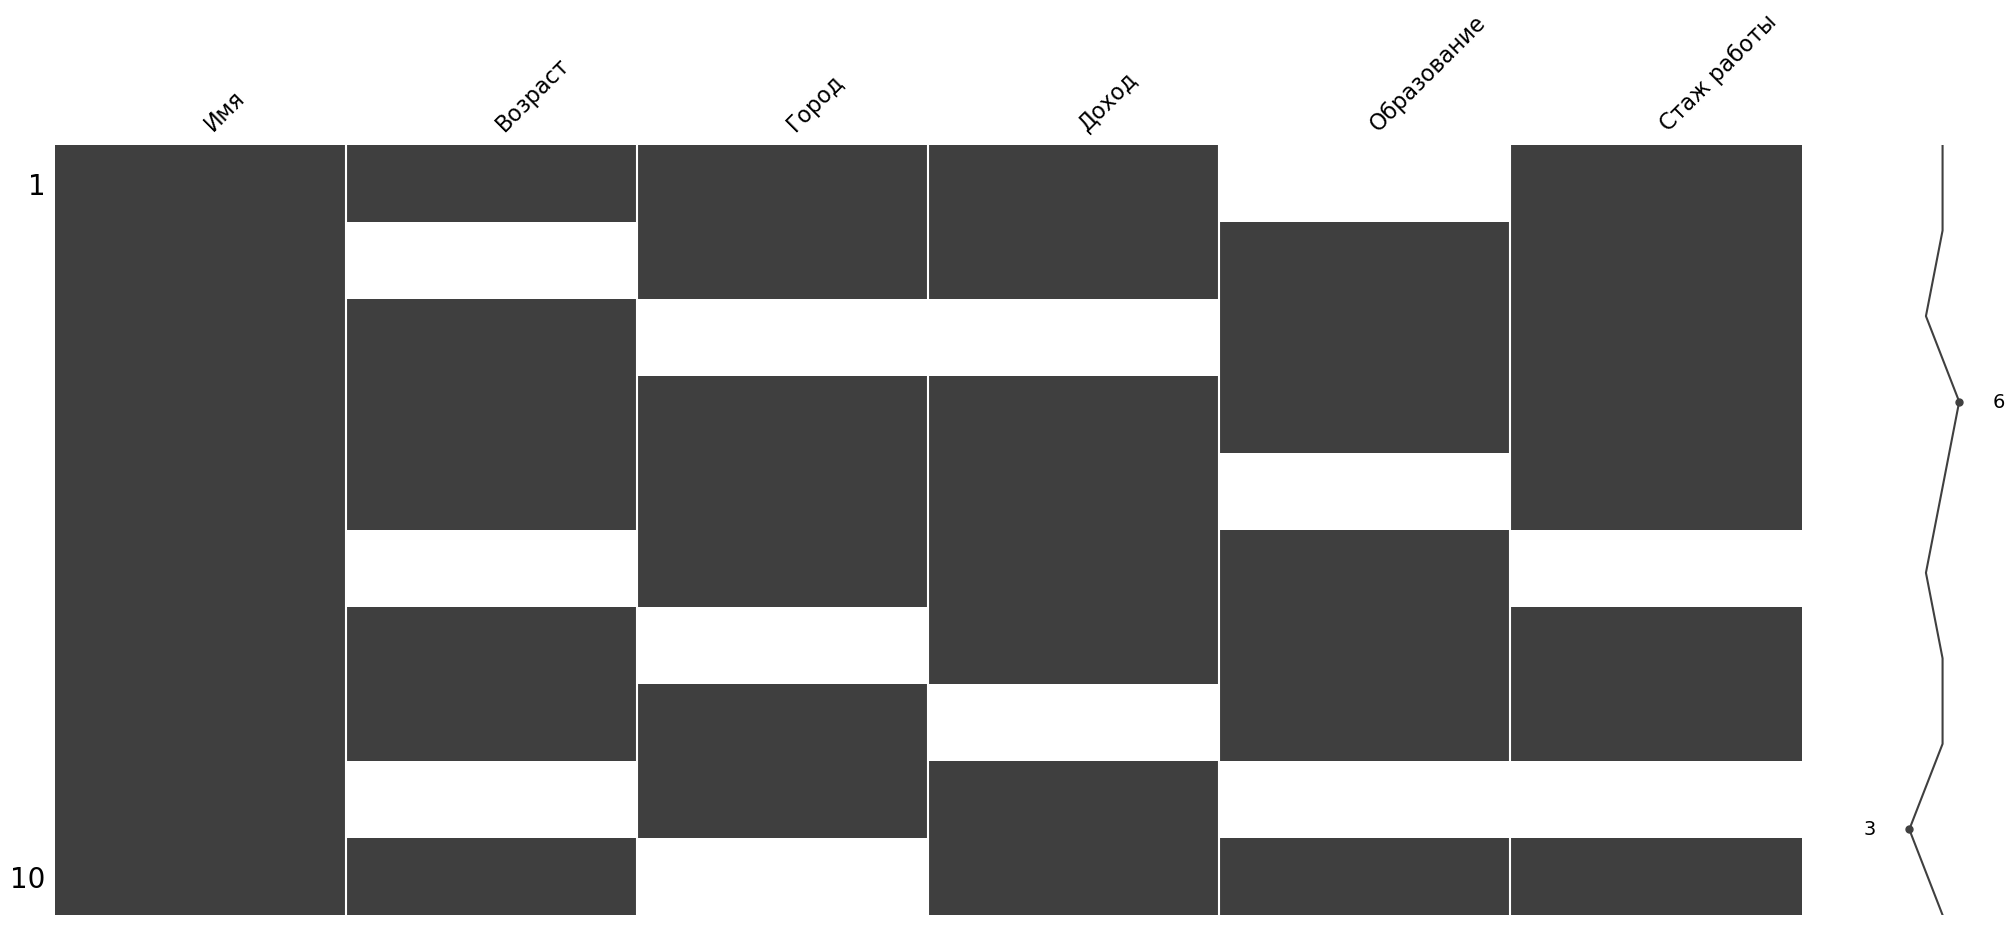

In [33]:
msno.matrix(df)
plt.show()

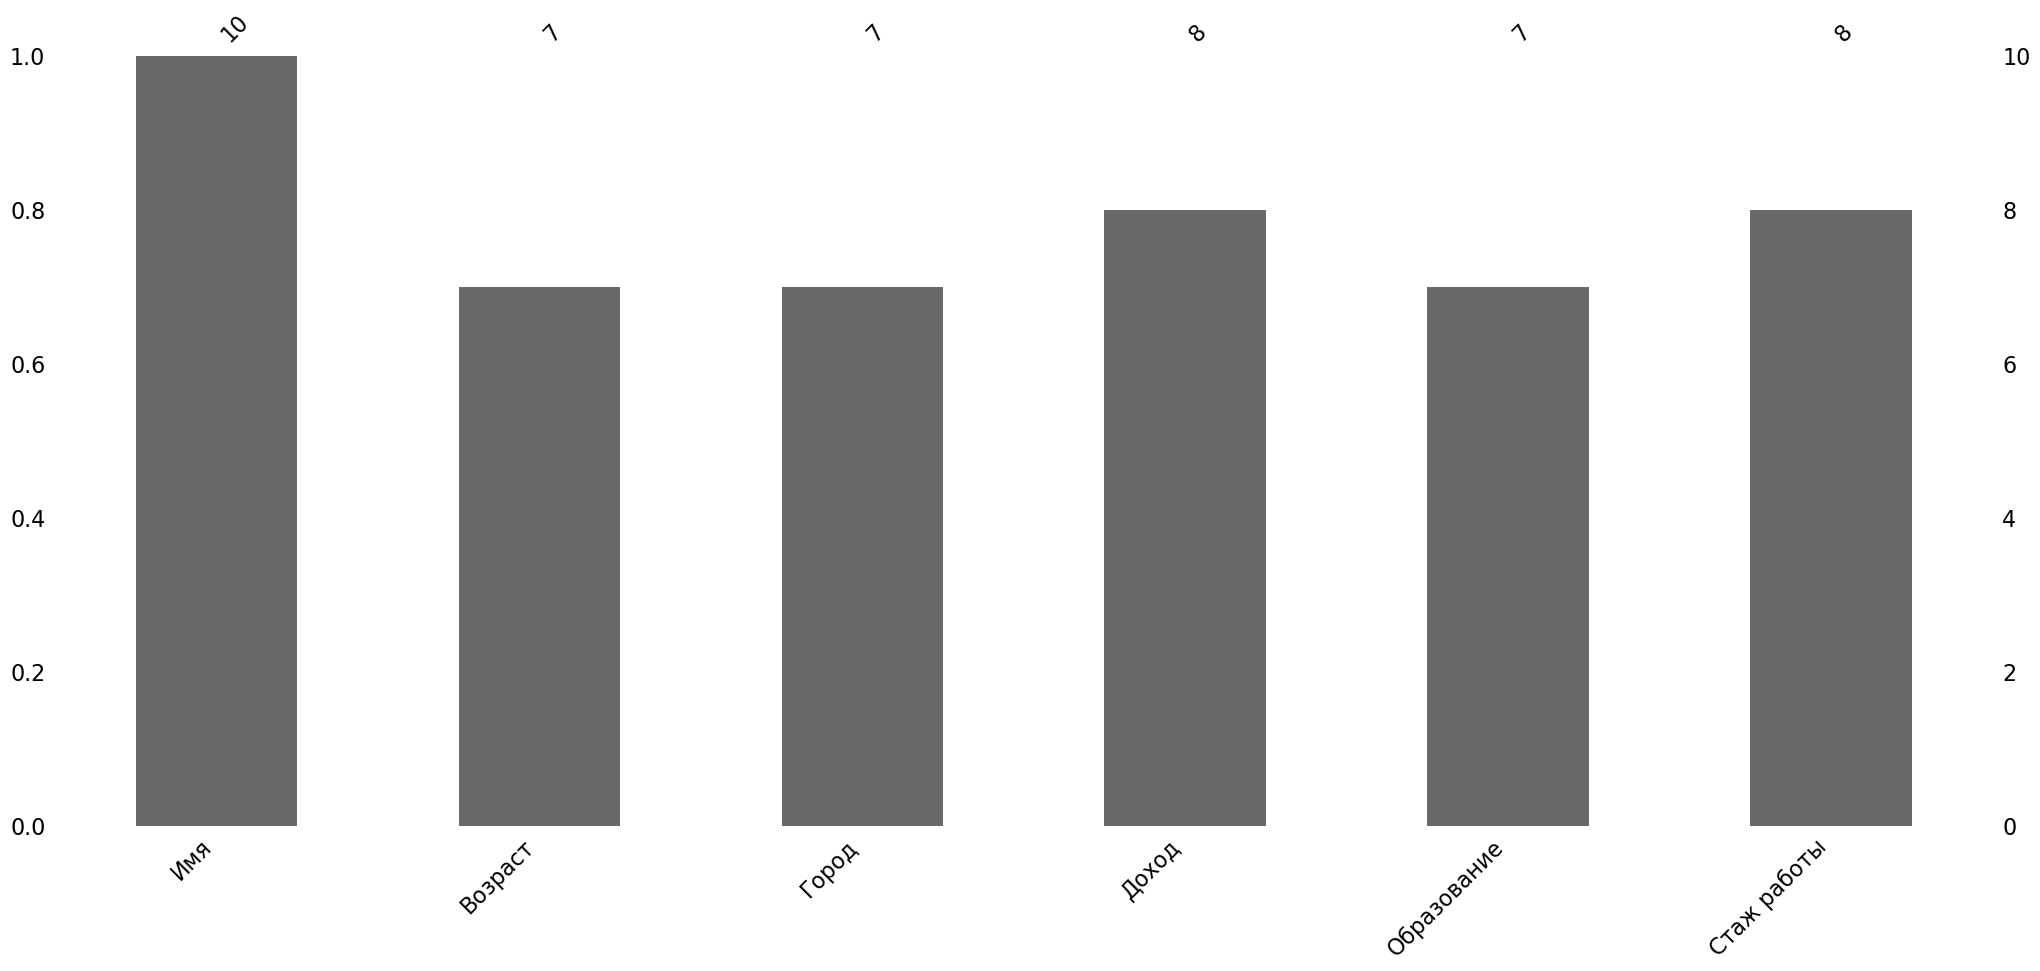

In [35]:
msno.bar(df)
plt.show()

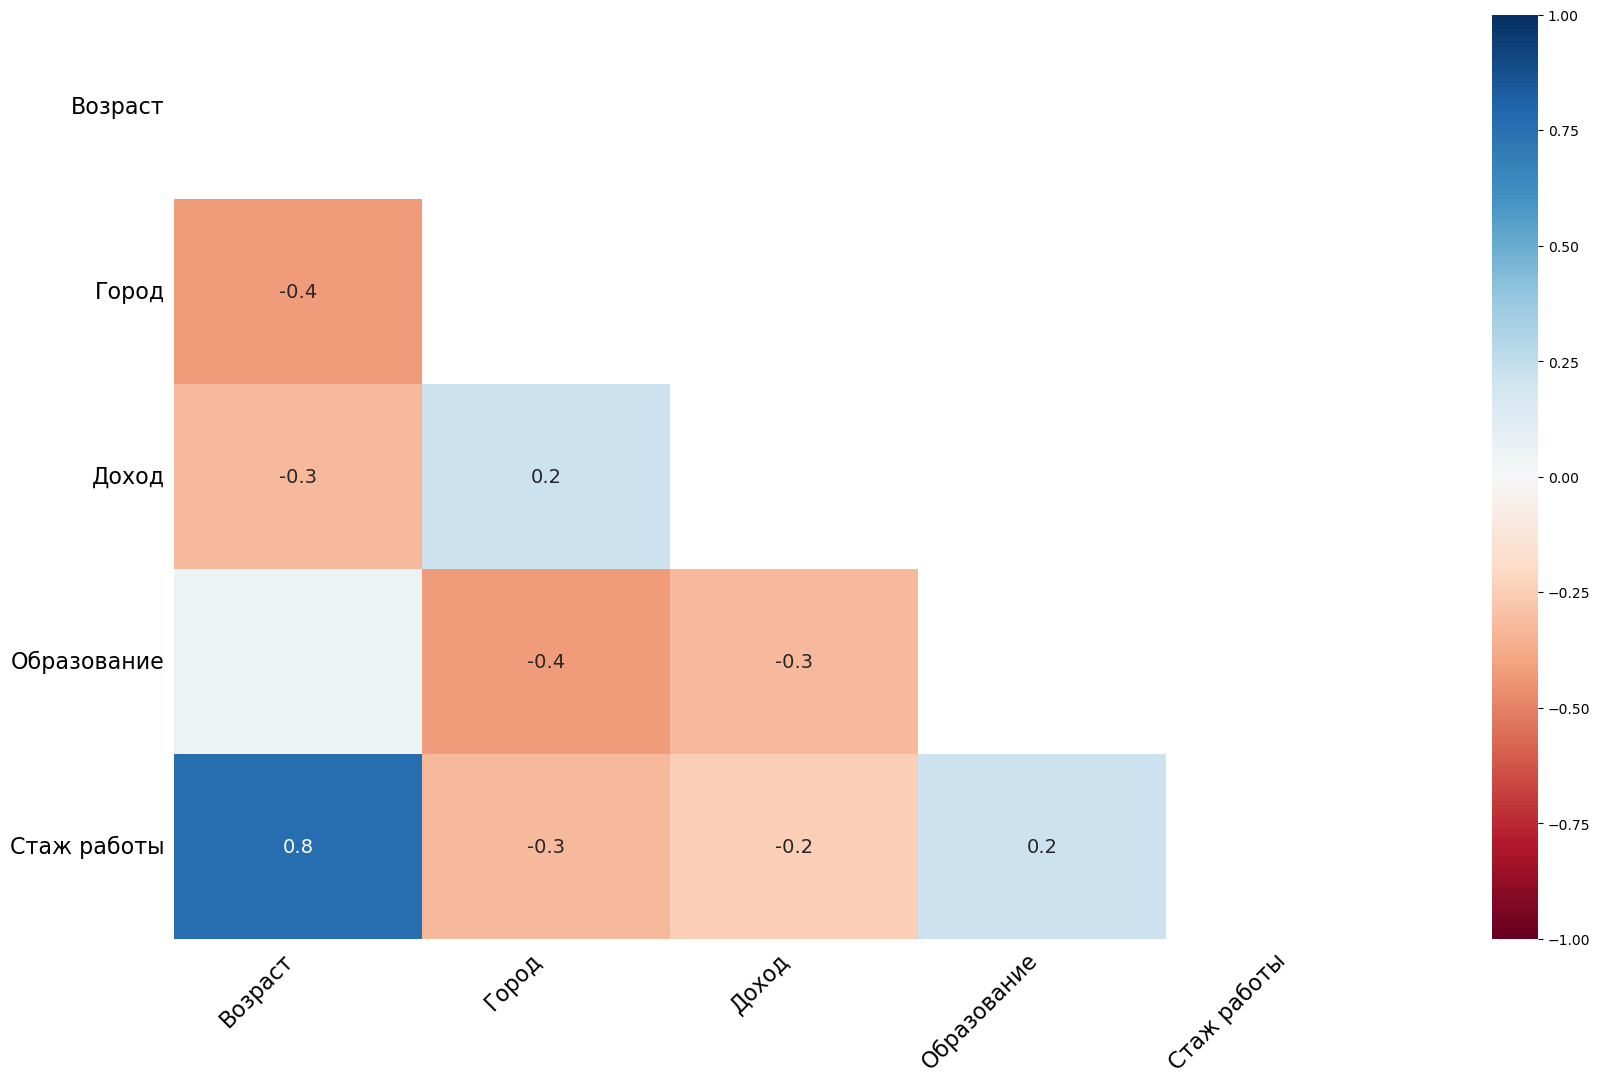

In [37]:
msno.heatmap(df)
plt.show()

In [132]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий"],
    "Возраст": [25, np.nan, 22, 40, 35, np.nan],
    "Город": ["Москва", "СПб", np.nan, "Новосибирск", "СПб","Екатеринбург"],
    "Доход": [50000, 60000, np.nan, 70000, 65000, 55000],
    "Баланс на счете": [2000, 200, np.nan, 333, 10000, np.nan]
}

df = pd.DataFrame(data)

print(df)

       Имя  Возраст         Город    Доход  Баланс на счете
0     Анна     25.0        Москва  50000.0           2000.0
1     Иван      NaN           СПб  60000.0            200.0
2    Ольга     22.0           NaN      NaN              NaN
3     Петр     40.0   Новосибирск  70000.0            333.0
4    Мария     35.0           СПб  65000.0          10000.0
5  Дмитрий      NaN  Екатеринбург  55000.0              NaN


In [65]:
df_cleaned = df.dropna()

print(df_cleaned)

     Имя  Возраст        Город    Доход
0   Анна     25.0       Москва  50000.0
3   Петр     40.0  Новосибирск  70000.0
4  Мария     35.0          СПб  65000.0


In [67]:
df_cleaned = df.dropna(how="all")
print(df_cleaned)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


In [75]:
df_cleaned = df.dropna(axis=1)
print(df_cleaned)

       Имя
0     Анна
1     Иван
2    Ольга
3     Петр
4    Мария
5  Дмитрий


In [73]:
df_cleaned = df.dropna(thresh=3)
print(df_cleaned)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


In [79]:
df_cleaned = df.dropna(axis=1, thresh=4)
print(df_cleaned)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


In [ ]:
df["Возраст"] = df["Возраст"].fillna(30)
print(df)

In [94]:
df["Возраст"] = df["Возраст"].fillna(method="ffill")
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван     30.0           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий     30.0  Екатеринбург  55000.0


C:\Users\vadim\AppData\Local\Temp\ipykernel_4768\2065387891.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Возраст"] = df["Возраст"].fillna(method="ffill")


In [100]:
df["Город"] = df["Город"].fillna(method="bfill")
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван     30.0           СПб  60000.0
2    Ольга     22.0   Новосибирск      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий     30.0  Екатеринбург  55000.0


C:\Users\vadim\AppData\Local\Temp\ipykernel_4768\2394887974.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Город"] = df["Город"].fillna(method="bfill")


In [104]:
df["Возраст"] = df["Возраст"].fillna(method="ffill").fillna(method="bfill")

C:\Users\vadim\AppData\Local\Temp\ipykernel_4768\1177460763.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Возраст"] = df["Возраст"].fillna(method="ffill").fillna(method="bfill")


In [110]:
df = pd.DataFrame(
    {
    "день": [1, 2, 3, 4, 5],
    "температура": [20.0, np.nan, np.nan, 24.0, 25.0]
    }
)
df["температура_interp"] = df["температура"].interpolate()
print(df)

   день  температура  температура_interp
0     1         20.0           20.000000
1     2          NaN           21.333333
2     3          NaN           22.666667
3     4         24.0           24.000000
4     5         25.0           25.000000


In [114]:
df["температура_poly"] = df["температура"].interpolate(method="polynomial", order=2)
print(df)

   день  температура  температура_interp  температура_poly
0     1         20.0           20.000000         20.000000
1     2          NaN           21.333333         21.500000
2     3          NaN           22.666667         22.833333
3     4         24.0           24.000000         24.000000
4     5         25.0           25.000000         25.000000


In [118]:
dates = pd.date_range("2024-01-01", periods=5, freq="D")
df = pd.DataFrame({
    "дата": dates,
    "уровень воды": [1.2, np.nan, np.nan, 1.8, 2.0]
})
df.set_index("дата", inplace=True)
df["интерполяция"] = df["уровень воды"].interpolate(method="time")
print(df)

            уровень воды  интерполяция
дата                                  
2024-01-01           1.2           1.2
2024-01-02           NaN           1.4
2024-01-03           NaN           1.6
2024-01-04           1.8           1.8
2024-01-05           2.0           2.0


In [124]:
mean = df["Возраст"].mean()
std = df["Возраст"].std()
z = (df["Возраст"] - mean) / std
outliers = df[abs(z) > 3]

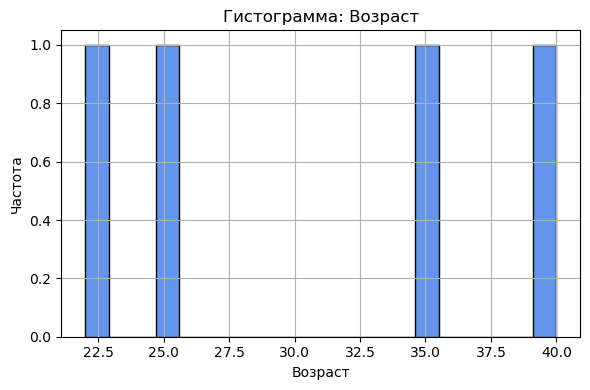

In [128]:
# Гистограмма (Возраст)
plt.figure(figsize=(6, 4))
plt.hist(df["Возраст"], bins=20, color='cornflowerblue',
edgecolor='black')
plt.title("Гистограмма: Возраст")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

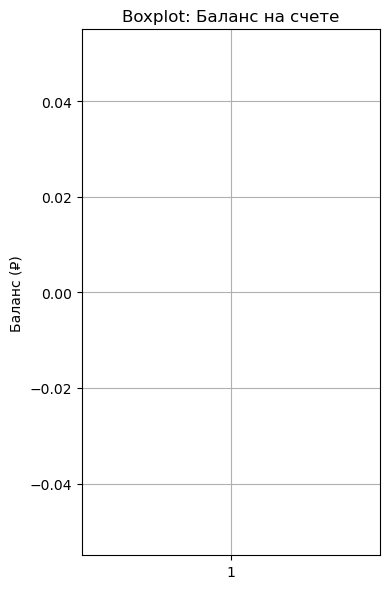

In [134]:
plt.figure(figsize=(4, 6))
plt.boxplot(df["Баланс на счете"], vert=True)
plt.title("Boxplot: Баланс на счете")
plt.ylabel("Баланс (₽)")
plt.grid(True)
plt.tight_layout()
plt.show()

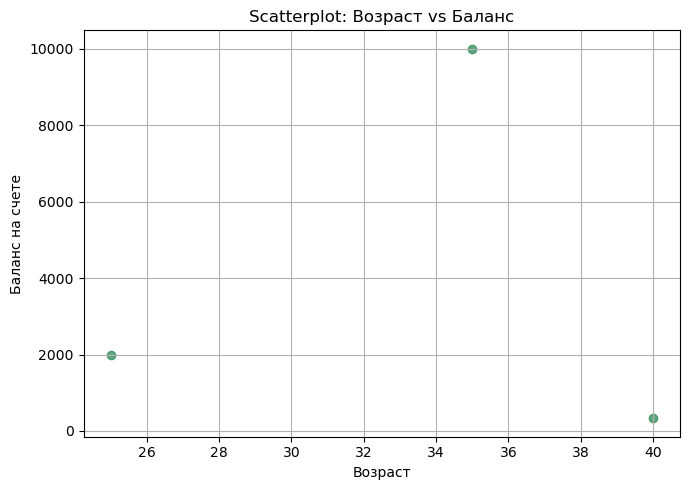

In [136]:
plt.figure(figsize=(7, 5))
plt.scatter(df["Возраст"], df["Баланс на счете"], alpha=0.75,
color='seagreen')
plt.title("Scatterplot: Возраст vs Баланс")
plt.xlabel("Возраст")
plt.ylabel("Баланс на счете")
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий","Елена"],
    "Баланс на счете": [50000, 60000, 45000, 70000, 65000, 400000,450000]
}
df = pd.DataFrame(data)
print(df)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            70000
4    Мария            65000
5  Дмитрий           400000
6    Елена           450000


In [146]:
Q1 = df["Баланс на счете"].quantile(0.25)
Q3 = df["Баланс на счете"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_removed = df[(df["Баланс на счете"] >= lower) & (df["Баланс на счете"] <= upper)]
print(df_removed)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            70000
4    Мария            65000
5  Дмитрий           400000
6    Елена           450000


In [150]:
df_clipped = df.copy()
df_clipped["Баланс на счете"] = df["Баланс на счете"].clip(lower,upper)
print(df_clipped)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            70000
4    Мария            65000
5  Дмитрий           400000
6    Елена           450000


In [154]:
median = df["Баланс на счете"].median()
df_replaced = df.copy()
df_replaced["Баланс на счете"] = df["Баланс на счете"].apply(
    lambda x: median if x < lower or x > upper else x
)
print(df_replaced)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            70000
4    Мария            65000
5  Дмитрий           400000
6    Елена           450000


In [156]:
df_log = df.copy()
df_log["Лог баланс"] = np.log1p(df["Баланс на счете"])
print(df_log[["Имя", "Баланс на счете", "Лог баланс"]])

       Имя  Баланс на счете  Лог баланс
0     Анна            50000   10.819798
1     Иван            60000   11.002117
2    Ольга            45000   10.714440
3     Петр            70000   11.156265
4    Мария            65000   11.082158
5  Дмитрий           400000   12.899222
6    Елена           450000   13.017005


In [158]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
    "Возраст": [25, 30, 22, 40, 35],
    "Зарплата": [50000, 60000, 45000, 70000, 65000]
}
df = pd.DataFrame(data)
print(df)

     Имя  Возраст  Зарплата
0   Анна       25     50000
1   Иван       30     60000
2  Ольга       22     45000
3   Петр       40     70000
4  Мария       35     65000


In [164]:
df_standardized = df.copy()
df_standardized["Возраст"] = (df["Возраст"] - df["Возраст"].mean()) / df["Возраст"].std()
df_standardized["Зарплата"] = (df["Зарплата"] - df["Зарплата"].mean()) / df["Зарплата"].std()
print(df_standardized)

     Имя   Возраст  Зарплата
0   Анна -0.739657 -0.771589
1   Иван -0.054789  0.192897
2  Ольга -1.150577 -1.253831
3   Петр  1.314945  1.157383
4  Мария  0.630078  0.675140


In [168]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

     Имя   Возраст  Зарплата
0   Анна -0.826961 -0.862662
1   Иван -0.061256  0.215666
2  Ольга -1.286384 -1.401826
3   Петр  1.470153  1.293993
4  Мария  0.704448  0.754829


In [172]:
df_normalized = df.copy()
df_normalized["Возраст"] = (df["Возраст"] - df["Возраст"].min()) / (df["Возраст"].max() - df["Возраст"].min())
df_normalized["Зарплата"] = (df["Зарплата"] - df["Зарплата"].min()) / (df["Зарплата"].max() - df["Зарплата"].min())
print(df_normalized)

     Имя   Возраст  Зарплата
0   Анна  0.166667       0.2
1   Иван  0.444444       0.6
2  Ольга  0.000000       0.0
3   Петр  1.000000       1.0
4  Мария  0.722222       0.8


In [178]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

     Имя   Возраст  Зарплата
0   Анна  0.166667       0.2
1   Иван  0.444444       0.6
2  Ольга  0.000000       0.0
3   Петр  1.000000       1.0
4  Мария  0.722222       0.8


In [182]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий","Елена"],
    "Возраст": [25, 30, 22, 40, 35, 120, 5], # выбросы: 120, 5
    "Зарплата": [50000, 60000, 45000, 70000, 65000, 1000000, 10000] #выбросы: 1000000, 10000
}
df = pd.DataFrame(data)
print(df)

       Имя  Возраст  Зарплата
0     Анна       25     50000
1     Иван       30     60000
2    Ольга       22     45000
3     Петр       40     70000
4    Мария       35     65000
5  Дмитрий      120   1000000
6    Елена        5     10000


In [184]:
df_robust = df.copy()
for col in ["Возраст", "Зарплата"]:
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df_robust[col] = (df[col] - median) / iqr
print(df_robust)

       Имя   Возраст  Зарплата
0     Анна -0.357143     -0.50
1     Иван  0.000000      0.00
2    Ольга -0.571429     -0.75
3     Петр  0.714286      0.50
4    Мария  0.357143      0.25
5  Дмитрий  6.428571     47.00
6    Елена -1.785714     -2.50


In [188]:
scaler = RobustScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

       Имя   Возраст  Зарплата
0     Анна -0.357143     -0.50
1     Иван  0.000000      0.00
2    Ольга -0.571429     -0.75
3     Петр  0.714286      0.50
4    Мария  0.357143      0.25
5  Дмитрий  6.428571     47.00
6    Елена -1.785714     -2.50


In [190]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
    "Образование": ["среднее", "высшее", "начальное", "высшее", "среднее"]
}
df = pd.DataFrame(data)
print(df)

     Имя Образование
0   Анна     среднее
1   Иван      высшее
2  Ольга   начальное
3   Петр      высшее
4  Мария     среднее


In [192]:
df_encoded = df.copy()
df_encoded["Образование"] = pd.factorize(df["Образование"])[0]
print(df_encoded)

     Имя  Образование
0   Анна            0
1   Иван            1
2  Ольга            2
3   Петр            1
4  Мария            0


In [194]:
ordered_mapping = {
    "начальное": 0,
    "среднее": 1,
    "высшее": 2
}
df_ordered = df.copy()
df_ordered["Образование"] = df["Образование"].map(ordered_mapping)
print(df_ordered)

     Имя  Образование
0   Анна            1
1   Иван            2
2  Ольга            0
3   Петр            2
4  Мария            1


In [198]:
encoder = OrdinalEncoder(categories=[["начальное", "среднее","высшее"]])
X = df[["Образование"]]
X_encoded = encoder.fit_transform(X)
df_encoded = df.copy()
df_encoded["Образование"] = X_encoded
print(df_encoded)

     Имя  Образование
0   Анна          1.0
1   Иван          2.0
2  Ольга          0.0
3   Петр          2.0
4  Мария          1.0


In [200]:
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Город": ["Москва", "СПб", "Казань", "Москва", "Казань"]
}
df = pd.DataFrame(data)
print(df)

     Имя   Город
0   Анна  Москва
1   Иван     СПб
2  Ольга  Казань
3   Петр  Москва
4  Мария  Казань


In [202]:
df_encoded = pd.get_dummies(df, columns=["Город"])
print(df_encoded)

     Имя  Город_Казань  Город_Москва  Город_СПб
0   Анна         False          True      False
1   Иван         False         False       True
2  Ольга          True         False      False
3   Петр         False          True      False
4  Мария          True         False      False


In [216]:
encoder = OneHotEncoder()  # sparse=True по умолчанию
encoded = encoder.fit_transform(df[["Город"]]).toarray()  # преобразуем в массив
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Город"]))
print(df_encoded)

   Город_Казань  Город_Москва  Город_СПб
0           0.0           1.0        0.0
1           0.0           0.0        1.0
2           1.0           0.0        0.0
3           0.0           1.0        0.0
4           1.0           0.0        0.0


In [226]:
data = {
    "Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Олег","Светлана"],
    "Город": ["Москва", "СПб", "Казань", "Москва", "Казань", "СПб","Казань"],
    "Доход": [50000, 60000, 45000, 70000, 65000, 58000, 47000]
}
df = pd.DataFrame(data)
print(df)

        Имя   Город  Доход
0      Анна  Москва  50000
1      Иван     СПб  60000
2     Ольга  Казань  45000
3      Петр  Москва  70000
4     Мария  Казань  65000
5      Олег     СПб  58000
6  Светлана  Казань  47000


In [220]:
mean_target = df.groupby("Город")["Доход"].mean()
df_encoded = df.copy()
df_encoded["Город"] = df["Город"].map(mean_target)
print(df_encoded)

        Имя         Город  Доход
0      Анна  60000.000000  50000
1      Иван  59000.000000  60000
2     Ольга  52333.333333  45000
3      Петр  60000.000000  70000
4     Мария  52333.333333  65000
5      Олег  59000.000000  58000
6  Светлана  52333.333333  47000
